In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
fileName = '../data/interim/indexed-dataFrame.csv'
dataset = pd.read_csv(fileName, index_col='Time', parse_dates=True)

In [4]:
# A quick look at the first few rows and columns of the data
dataset.iloc[:5, :11]

,fuelConsumption,HFO,MGO,draftForward,draftAft,draftMid1,draftMid2,shaftSpeed,shaftTorque,shaftPower,speedGround
Time,,,,,,,,,,,
2017-07-06 13:15:00,0.0,0.0,0.0,0.0,0.0,0.0,11.497695,84.878837,1013.631639,0.0,15.463448
2017-07-06 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,11.509352,84.868300,1004.244559,0.0,15.744354
2017-07-06 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,11.531678,84.874972,1003.751648,0.0,15.939796
2017-07-06 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,11.545624,84.867446,1010.716545,0.0,16.135230
2017-07-06 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,11.549795,84.864535,1013.179696,0.0,16.176168


In [5]:
dataset.dtypes

fuelConsumption     float64
HFO                 float64
MGO                 float64
draftForward        float64
draftAft            float64
draftMid1           float64
draftMid2           float64
shaftSpeed          float64
shaftTorque         float64
shaftPower          float64
speedGround         float64
speedWater          float64
heading             float64
rudderAngle         float64
AWS                 float64
AWD                 float64
TWS                 float64
TWD                 float64
temp                float64
currentDirection    float64
currentSpeed        float64
waterDepth          float64
waveHeight          float64
wavePeriod          float64
waveDirection       float64
dtype: object

**Statistical Summaries**

In [6]:
pd.set_option('display.width', 0)
pd.set_option('precision', 4)
description = dataset.describe()
description.iloc[:, :11]

,fuelConsumption,HFO,MGO,draftForward,draftAft,draftMid1,draftMid2,shaftSpeed,shaftTorque,shaftPower,speedGround
count,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000,16085.0000
mean,17.1799,0.8164,0.1742,8.0529,9.5256,8.7876,8.8871,50.9423,576.6316,4723.0028,9.3233
std,20.7597,0.3867,0.3788,2.6477,1.9165,2.2452,2.1067,36.6772,444.5160,4034.6219,6.5647
min,-22.5655,0.0000,0.0000,0.0000,0.0000,0.0000,5.6812,-7.1103,-0.0014,0.0000,0.0000
25%,-0.0480,1.0000,0.0000,5.7819,7.9499,6.8325,6.8541,0.0000,7.3894,6.9517,0.4347
50%,15.9220,1.0000,0.0000,7.2750,8.9124,8.1449,8.2967,69.7246,711.6736,5063.0435,12.3860
75%,39.7848,1.0000,0.0000,10.9297,11.5503,11.2648,11.3110,85.4579,1025.6620,9154.3486,15.1180
max,49.0908,1.0000,1.0000,13.1366,12.5892,12.1324,12.1279,88.9594,1206.0915,11150.0420,19.8449


**Correlations**

In [7]:
pd.set_option('precision', 3)
cols_to_drop = ['HFO', 'MGO', 'currentDirection', 'currentSpeed', 'waterDepth', 'waveHeight', 'wavePeriod', 
                'waveDirection']
correlations = dataset.drop(cols_to_drop, axis=1).corr(method='pearson')
correlations.iloc[:10, :11]

,fuelConsumption,draftForward,draftAft,draftMid1,draftMid2,shaftSpeed,shaftTorque,shaftPower,speedGround,speedWater,heading
fuelConsumption,1.000,0.164,0.224,0.185,0.157,0.729,0.773,0.799,0.728,0.728,0.062
draftForward,0.164,1.000,0.948,0.983,0.916,0.133,0.204,0.309,0.107,0.109,-0.099
draftAft,0.224,0.948,1.000,0.981,0.839,0.201,0.266,0.387,0.168,0.170,-0.085
draftMid1,0.185,0.983,0.981,1.000,0.893,0.147,0.220,0.333,0.113,0.115,-0.083
draftMid2,0.157,0.916,0.839,0.893,1.000,0.183,0.259,0.303,0.148,0.149,-0.132
shaftSpeed,0.729,0.133,0.201,0.147,0.183,1.000,0.980,0.931,0.989,0.992,-0.009
shaftTorque,0.773,0.204,0.266,0.220,0.259,0.980,1.000,0.975,0.964,0.966,-0.017
shaftPower,0.799,0.309,0.387,0.333,0.303,0.931,0.975,1.000,0.916,0.917,-0.014
speedGround,0.728,0.107,0.168,0.113,0.148,0.989,0.964,0.916,1.000,0.995,-0.005
speedWater,0.728,0.109,0.170,0.115,0.149,0.992,0.966,0.917,0.995,1.000,-0.003


In [8]:
# Skewness of univariate distributions
dataset.skew()

fuelConsumption     -0.129
HFO                 -1.635
MGO                  1.718
draftForward         0.049
draftAft            -0.647
draftMid1           -0.170
draftMid2            0.228
shaftSpeed          -0.520
shaftTorque         -0.215
shaftPower           0.059
speedGround         -0.492
speedWater          -0.509
heading             -0.226
rudderAngle         -2.726
AWS                  0.642
AWD                  0.393
TWS                  0.668
TWD                 -0.091
temp               -14.765
currentDirection     0.608
currentSpeed         3.054
waterDepth           3.458
waveHeight           3.095
wavePeriod           2.004
waveDirection        2.356
dtype: float64

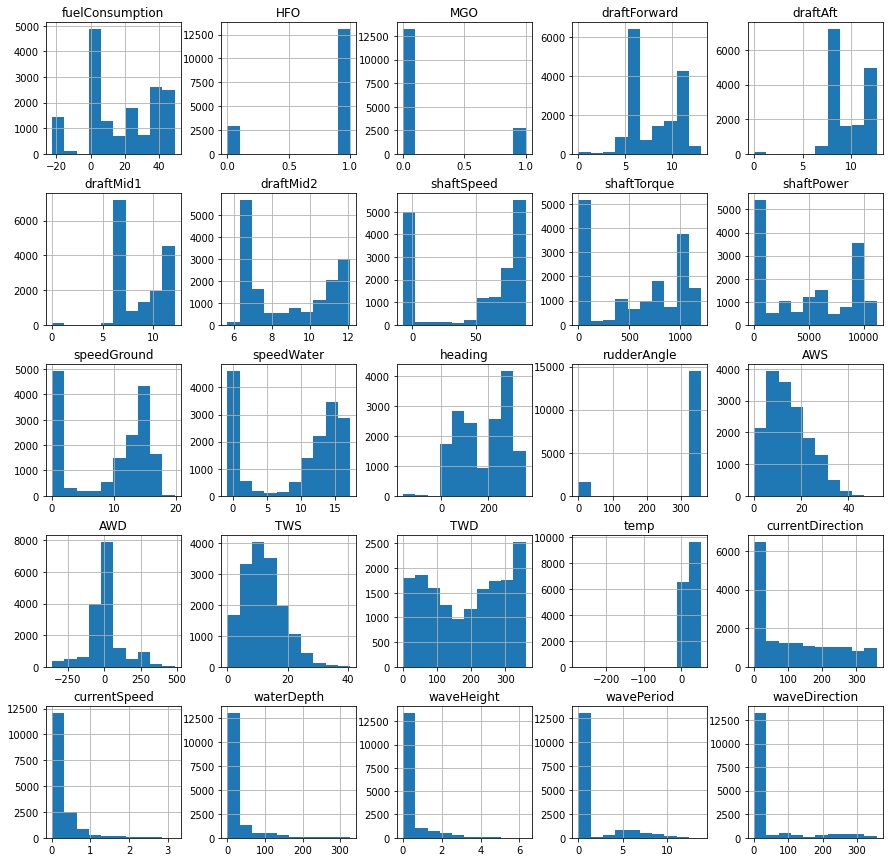

In [9]:
# The semicolon after plot function supresses the text output
dataset.hist();

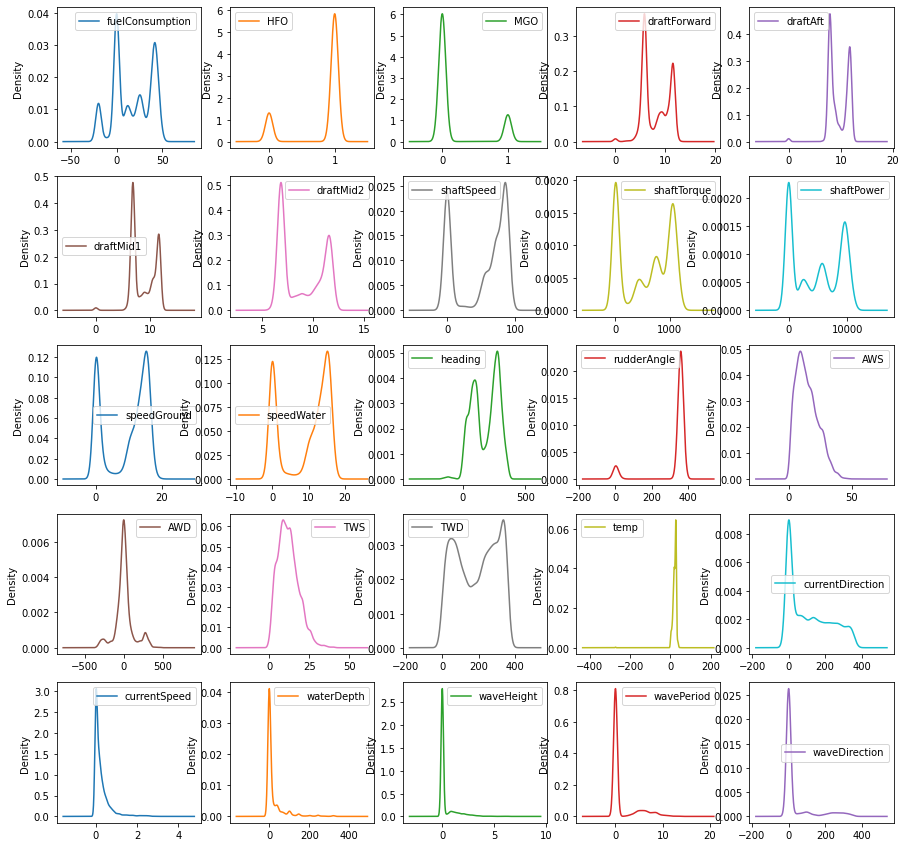

In [10]:
dataset.plot(kind='density', subplots=True, layout=(5,5), sharex=False);

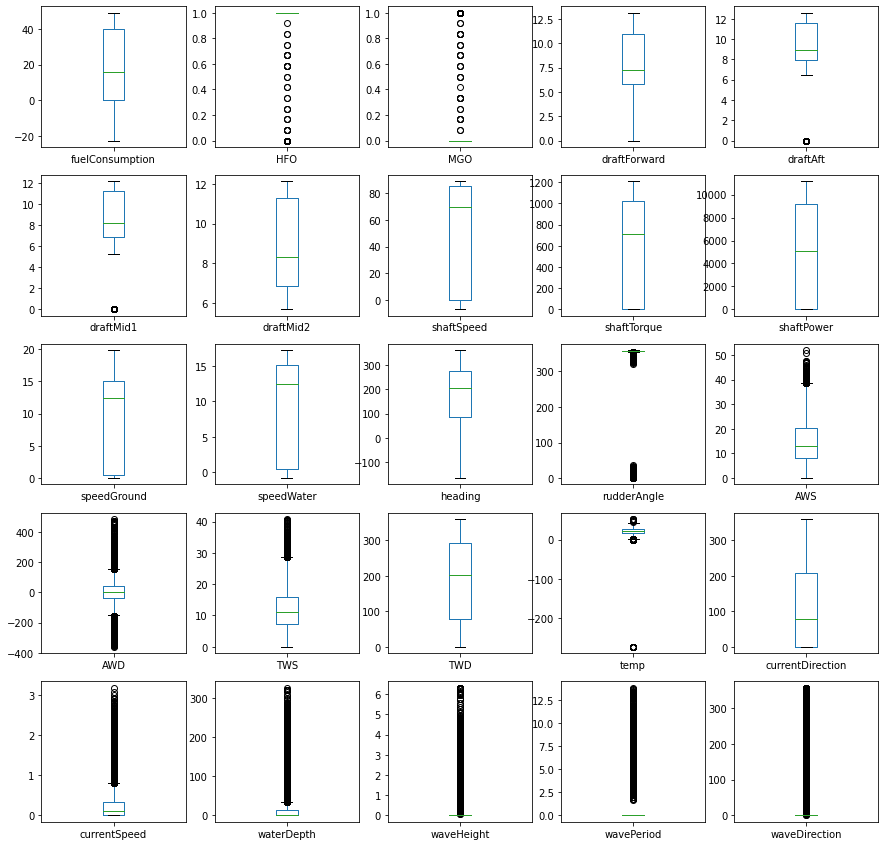

In [11]:
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False);

**Correlation Plots**

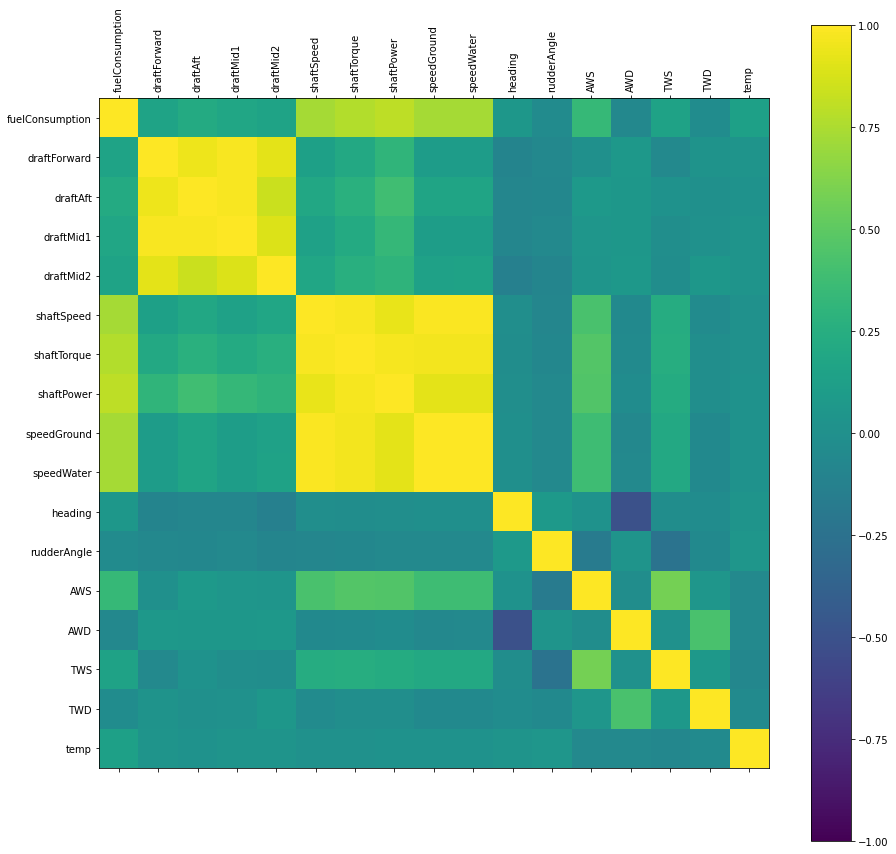

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,17,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.drop(cols_to_drop, axis=1).columns, rotation=90)
ax.set_yticklabels(dataset.drop(cols_to_drop, axis=1).columns);

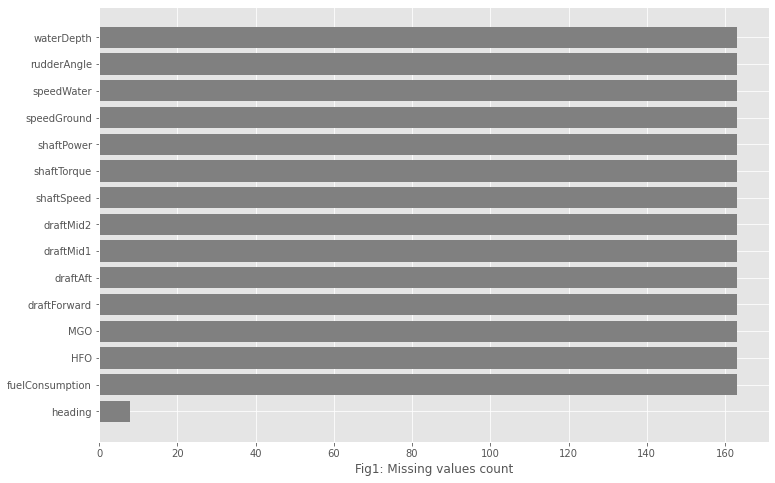

In [13]:
# Missing values count plot
nan_all = dataset.isna().sum()
missing = nan_all[nan_all != 0].sort_values()

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(missing.index, missing.values, color='gray')
ax.set_xlabel("Fig1: Missing values count");

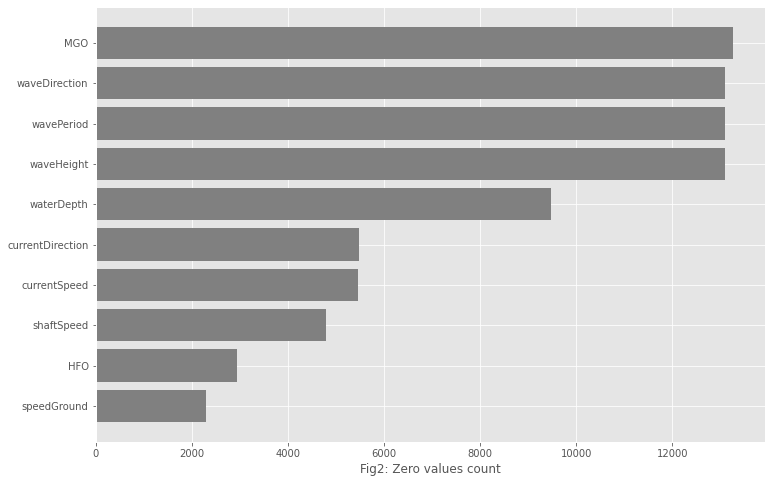

In [14]:
# Zero values counts plot
zeroCounts_all = (dataset == 0).sum().sort_values()
zeroCounts = zeroCounts_all[zeroCounts_all > 500]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(zeroCounts.index, zeroCounts.values, color='gray')
ax.set_xlabel("Fig2: Zero values count");